In [1]:
import pandas as pd
import numpy as np

In [2]:
config={
    
    'Path': r"D:\Github\NLP_Duplicate_questions\quora-question-pairs\train.csv\train.csv"
    
    
}

In [3]:
main_df=pd.read_csv(config['Path'])
# main_df=pd.read_csv(r"D:\Github\NLP_Duplicate_questions\BOW_Data.csv")
main_df

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
...,...,...,...,...,...,...
404285,404285,433578,379845,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404286,404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1
404287,404287,537928,537929,What is one coin?,What's this coin?,0
404288,404288,537930,537931,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0


In [4]:
df=main_df.sample(25000,random_state=69)
del main_df

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25000 entries, 188277 to 237324
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            25000 non-null  int64 
 1   qid1          25000 non-null  int64 
 2   qid2          25000 non-null  int64 
 3   question1     25000 non-null  object
 4   question2     25000 non-null  object
 5   is_duplicate  25000 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 1.3+ MB


In [6]:
# funny = df[df['id']==404289]
df.isna().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [7]:
df=df.dropna()
df.isna().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [8]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
188277,188277,286753,286754,Why do we feel cold when we are ill?,Why do small illnesses like colds make you fee...,0
325462,325462,160263,451717,I booked some tickets on BookMyShow using net ...,If I have a debit card and I don't have a cred...,0
25041,25041,1775,46708,How on earth would I dress like a workout guy ...,How would I dress like a workout guy from the ...,1
53446,53446,94485,94486,What's the best POS system (iPad or not) for a...,What are the most useful gadgets for your iPho...,0
321887,321887,380388,447645,Why are clear face masks worn for basketball?,How can I make my face clean and soft?,0


In [9]:
ndf=df[['question1','question2']]
ndf

,question1,question2
188277,Why do we feel cold when we are ill?,Why do small illnesses like colds make you fee...
325462,I booked some tickets on BookMyShow using net ...,If I have a debit card and I don't have a cred...
25041,How on earth would I dress like a workout guy ...,How would I dress like a workout guy from the ...
53446,What's the best POS system (iPad or not) for a...,What are the most useful gadgets for your iPho...
321887,Why are clear face masks worn for basketball?,How can I make my face clean and soft?
...,...,...
114566,Where can I get the best digital marketing cou...,Will digital marketing a good course to learn?
112032,What is an alkali?,What is alkali?
137390,Is it unsafe to eat moldy fruit?,Is it healthy to eat seedless fruits?
239967,Is dxtorrent.com the new link to Kickass Torre...,Can Kickass torrent be online again?


## Making new features

In [10]:
import warnings
warnings.filterwarnings('ignore')

#### Len of q1 and q2

In [11]:
ndf['len_q1']=ndf['question1'].str.len()
ndf['len_q2']=ndf['question2'].str.len()
ndf

,question1,question2,len_q1,len_q2
188277,Why do we feel cold when we are ill?,Why do small illnesses like colds make you fee...,36,67
325462,I booked some tickets on BookMyShow using net ...,If I have a debit card and I don't have a cred...,147,147
25041,How on earth would I dress like a workout guy ...,How would I dress like a workout guy from the ...,79,56
53446,What's the best POS system (iPad or not) for a...,What are the most useful gadgets for your iPho...,74,70
321887,Why are clear face masks worn for basketball?,How can I make my face clean and soft?,45,38
...,...,...,...,...
114566,Where can I get the best digital marketing cou...,Will digital marketing a good course to learn?,78,46
112032,What is an alkali?,What is alkali?,18,15
137390,Is it unsafe to eat moldy fruit?,Is it healthy to eat seedless fruits?,32,37
239967,Is dxtorrent.com the new link to Kickass Torre...,Can Kickass torrent be online again?,64,36


#### Number of words in q1 and q2

In [12]:
ndf['num_words_q1']=ndf['question1'].apply(lambda row: len(row.split(' ')))
ndf['num_words_q2']=ndf['question2'].apply(lambda row: len(row.split(' ')))
ndf

,question1,question2,len_q1,len_q2,num_words_q1,num_words_q2
188277,Why do we feel cold when we are ill?,Why do small illnesses like colds make you fee...,36,67,9,12
325462,I booked some tickets on BookMyShow using net ...,If I have a debit card and I don't have a cred...,147,147,27,31
25041,How on earth would I dress like a workout guy ...,How would I dress like a workout guy from the ...,79,56,17,12
53446,What's the best POS system (iPad or not) for a...,What are the most useful gadgets for your iPho...,74,70,14,13
321887,Why are clear face masks worn for basketball?,How can I make my face clean and soft?,45,38,8,9
...,...,...,...,...,...,...
114566,Where can I get the best digital marketing cou...,Will digital marketing a good course to learn?,78,46,14,8
112032,What is an alkali?,What is alkali?,18,15,4,3
137390,Is it unsafe to eat moldy fruit?,Is it healthy to eat seedless fruits?,32,37,7,7
239967,Is dxtorrent.com the new link to Kickass Torre...,Can Kickass torrent be online again?,64,36,12,6


#### Number of common words between both the question

In [13]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return len(w1 & w2)

In [14]:
ndf['num_common_words'] = ndf.apply(common_words, axis=1)
ndf

,question1,question2,len_q1,len_q2,num_words_q1,num_words_q2,num_common_words
188277,Why do we feel cold when we are ill?,Why do small illnesses like colds make you fee...,36,67,9,12,3
325462,I booked some tickets on BookMyShow using net ...,If I have a debit card and I don't have a cred...,147,147,27,31,8
25041,How on earth would I dress like a workout guy ...,How would I dress like a workout guy from the ...,79,56,17,12,11
53446,What's the best POS system (iPad or not) for a...,What are the most useful gadgets for your iPho...,74,70,14,13,4
321887,Why are clear face masks worn for basketball?,How can I make my face clean and soft?,45,38,8,9,1
...,...,...,...,...,...,...,...
114566,Where can I get the best digital marketing cou...,Will digital marketing a good course to learn?,78,46,14,8,3
112032,What is an alkali?,What is alkali?,18,15,4,3,3
137390,Is it unsafe to eat moldy fruit?,Is it healthy to eat seedless fruits?,32,37,7,7,4
239967,Is dxtorrent.com the new link to Kickass Torre...,Can Kickass torrent be online again?,64,36,12,6,1


#### Total number of words

In [15]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return (len(w1) + len(w2))

In [16]:
ndf['total_num_words'] = ndf.apply(total_words, axis=1)
ndf

,question1,question2,len_q1,len_q2,num_words_q1,num_words_q2,num_common_words,total_num_words
188277,Why do we feel cold when we are ill?,Why do small illnesses like colds make you fee...,36,67,9,12,3,20
325462,I booked some tickets on BookMyShow using net ...,If I have a debit card and I don't have a cred...,147,147,27,31,8,45
25041,How on earth would I dress like a workout guy ...,How would I dress like a workout guy from the ...,79,56,17,12,11,28
53446,What's the best POS system (iPad or not) for a...,What are the most useful gadgets for your iPho...,74,70,14,13,4,27
321887,Why are clear face masks worn for basketball?,How can I make my face clean and soft?,45,38,8,9,1,17
...,...,...,...,...,...,...,...,...
114566,Where can I get the best digital marketing cou...,Will digital marketing a good course to learn?,78,46,14,8,3,22
112032,What is an alkali?,What is alkali?,18,15,4,3,3,7
137390,Is it unsafe to eat moldy fruit?,Is it healthy to eat seedless fruits?,32,37,7,7,4,14
239967,Is dxtorrent.com the new link to Kickass Torre...,Can Kickass torrent be online again?,64,36,12,6,1,17


#### Ratio of Common words : Total words 

In [17]:
ndf['word_share'] = round(ndf['num_common_words']/ndf['total_num_words'],2)
ndf

,question1,question2,len_q1,len_q2,num_words_q1,num_words_q2,num_common_words,total_num_words,word_share
188277,Why do we feel cold when we are ill?,Why do small illnesses like colds make you fee...,36,67,9,12,3,20,0.15
325462,I booked some tickets on BookMyShow using net ...,If I have a debit card and I don't have a cred...,147,147,27,31,8,45,0.18
25041,How on earth would I dress like a workout guy ...,How would I dress like a workout guy from the ...,79,56,17,12,11,28,0.39
53446,What's the best POS system (iPad or not) for a...,What are the most useful gadgets for your iPho...,74,70,14,13,4,27,0.15
321887,Why are clear face masks worn for basketball?,How can I make my face clean and soft?,45,38,8,9,1,17,0.06
...,...,...,...,...,...,...,...,...,...
114566,Where can I get the best digital marketing cou...,Will digital marketing a good course to learn?,78,46,14,8,3,22,0.14
112032,What is an alkali?,What is alkali?,18,15,4,3,3,7,0.43
137390,Is it unsafe to eat moldy fruit?,Is it healthy to eat seedless fruits?,32,37,7,7,4,14,0.29
239967,Is dxtorrent.com the new link to Kickass Torre...,Can Kickass torrent be online again?,64,36,12,6,1,17,0.06


#### EDA over New Features

minimum characters 1
maximum characters 335
average num of characters 59


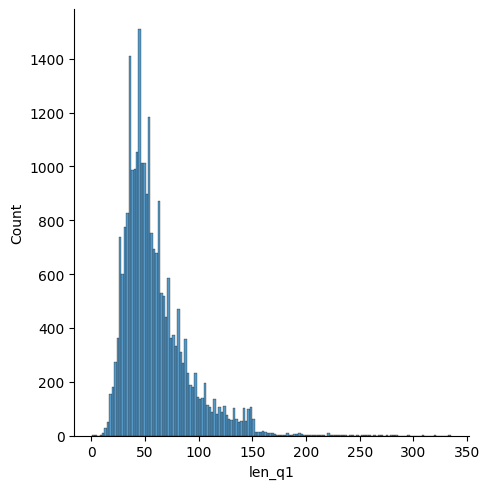

In [18]:
import seaborn as sns

sns.displot(ndf['len_q1'])
print('minimum characters',ndf['len_q1'].min())
print('maximum characters',ndf['len_q1'].max())
print('average num of characters',int(ndf['len_q1'].mean()))

minimum characters 1
maximum characters 335
average num of characters 59


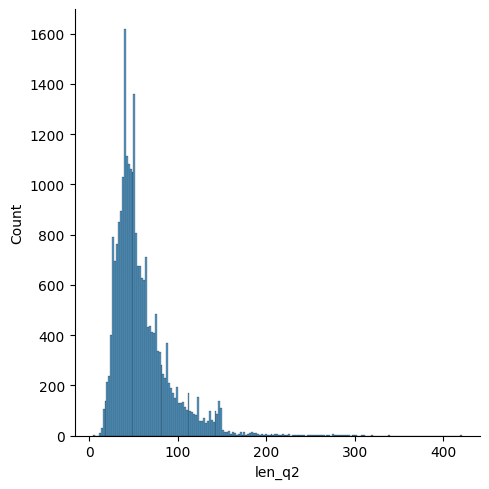

In [19]:
sns.displot(ndf['len_q2'])
print('minimum characters',ndf['len_q1'].min())
print('maximum characters',ndf['len_q1'].max())
print('average num of characters',int(ndf['len_q1'].mean()))

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

In [21]:
idxdf=ndf[['question1','question2']]
idxdf.index

Index([188277, 325462,  25041,  53446, 321887,    551, 282548,  51633, 122847,
       397400,
       ...
       238927,  86702, 266384, 188732, 386266, 114566, 112032, 137390, 239967,
       237324],
      dtype='int64', length=25000)

In [22]:
all_ques=list(ndf['question1']) + list(ndf['question2'])
len(all_ques)

50000

In [23]:
cv=CountVectorizer(max_features=3000)
cv_df=cv.fit_transform(all_ques).toarray()
# q1,q2=np.vsplit(cv.fit_transform(all_ques).toarray(),2)

In [24]:
q1,q2=np.vsplit(cv_df,2)
q1.shape

(25000, 3000)

In [25]:
dfq1=pd.DataFrame(q1,index=idxdf.index)
dfq2=pd.DataFrame(q2,index=idxdf.index)
# dfq1
temp_df=pd.concat([dfq1,dfq2],axis=1)
temp_df.shape

(25000, 6000)

In [26]:
temp_df

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
188277,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
325462,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25041,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53446,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
321887,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114566,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
112032,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
137390,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
239967,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
features7=ndf.iloc[:,2:]

In [28]:
fin_df=pd.concat([temp_df,features7],axis=1)
del temp_df
fin_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2997,2998,2999,len_q1,len_q2,num_words_q1,num_words_q2,num_common_words,total_num_words,word_share
188277,0,0,0,0,0,0,0,0,0,0,...,0,0,0,36,67,9,12,3,20,0.15
325462,0,0,0,0,0,0,0,0,0,0,...,0,0,0,147,147,27,31,8,45,0.18
25041,0,0,0,0,0,0,0,0,0,0,...,0,0,0,79,56,17,12,11,28,0.39
53446,0,0,0,0,0,0,0,0,0,0,...,0,0,0,74,70,14,13,4,27,0.15
321887,0,0,0,0,0,0,0,0,0,0,...,0,0,0,45,38,8,9,1,17,0.06


In [29]:
fin_df['is_duplicate']=df['is_duplicate']
fin_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2998,2999,len_q1,len_q2,num_words_q1,num_words_q2,num_common_words,total_num_words,word_share,is_duplicate
188277,0,0,0,0,0,0,0,0,0,0,...,0,0,36,67,9,12,3,20,0.15,0
325462,0,0,0,0,0,0,0,0,0,0,...,0,0,147,147,27,31,8,45,0.18,0
25041,0,0,0,0,0,0,0,0,0,0,...,0,0,79,56,17,12,11,28,0.39,1
53446,0,0,0,0,0,0,0,0,0,0,...,0,0,74,70,14,13,4,27,0.15,0
321887,0,0,0,0,0,0,0,0,0,0,...,0,0,45,38,8,9,1,17,0.06,0


In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(fin_df.iloc[:,0:-1].values,fin_df.iloc[:,-1].values,test_size=0.2,random_state=69)

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()

In [32]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [33]:
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7676